# Importing Packages

In [148]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from patsy import dmatrices
from pandas import Series
from matplotlib import pyplot
from datetime import datetime

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
import itertools 

from matplotlib.pyplot import figure

# 1. The quarterly gross domestic product series given series has components of  ``both Trend and seasonality``

In [18]:
from IPython.display import Image
display(Image("img.png"))

# 2 We know that in Additive seasonality ``Sum of additive seasonal indices = 0 `` therefore ``Q1+Q2+Q3+Q4=0`` i.e., ```Q3=-30```

In [19]:
# Sum of additive seasonal indices = 0
Q1=25
Q2=-5
Q4=10

In [20]:
Q3=-(Q1+Q2+Q4)

In [21]:
Q3

-30

# 3

## 3.a Data Reading

In [93]:
data=pd.read_csv('AusWineSales.csv')

In [94]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(data))

In [95]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = dates.year

In [96]:
data.set_index(dates, inplace=True)

In [97]:
# Deleting the YearMonth column from the orginal data
data.drop(['YearMonth'], axis=1, inplace=True) 

In [98]:
# Seperating data for different wines
datar=data[['Year','Month','Red']] # Red wine data
datas=data[['Year','Month','Sparkling']] #sparkiling wine data
datasw=data[['Year','Month','Sweetwhite']] # sweet white wine data

In [99]:
datar.head() 

,Year,Month,Red
1980-01-01,1980,Jan,464
1980-02-01,1980,Feb,675
1980-03-01,1980,Mar,703
1980-04-01,1980,Apr,887
1980-05-01,1980,May,1139


In [100]:
datas.head()

,Year,Month,Sparkling
1980-01-01,1980,Jan,1686
1980-02-01,1980,Feb,1591
1980-03-01,1980,Mar,2304
1980-04-01,1980,Apr,1712
1980-05-01,1980,May,1471


In [101]:
datasw.head()

,Year,Month,Sweetwhite
1980-01-01,1980,Jan,85
1980-02-01,1980,Feb,89
1980-03-01,1980,Mar,109
1980-04-01,1980,Apr,95
1980-05-01,1980,May,91


## 3.b

In [103]:
sw=datasw['Sweetwhite']
sw.head()

1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
Freq: MS, Name: Sweetwhite, dtype: int64

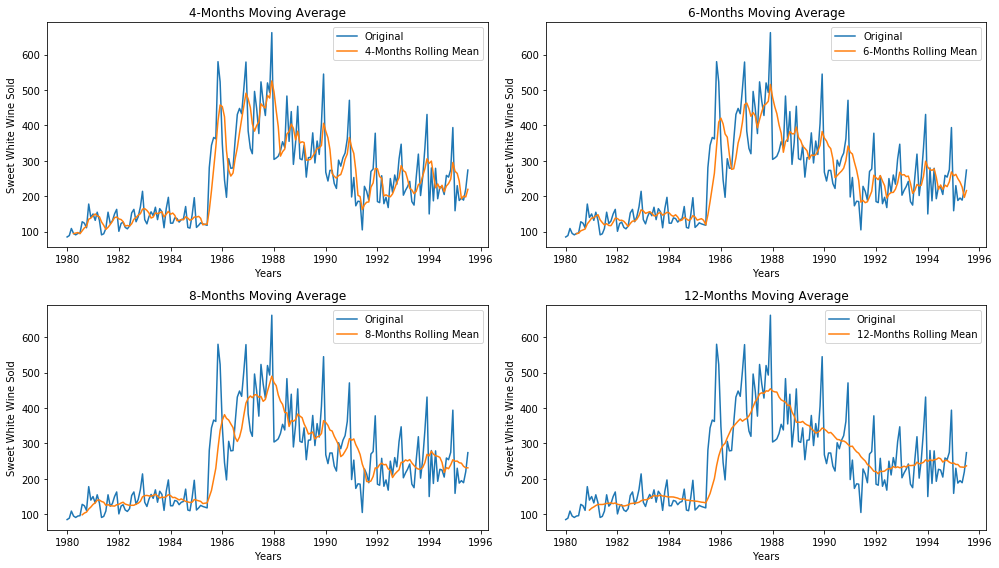

In [107]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sw.index, sw, label='Original')
axes[0][0].plot(sw.index, sw.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Sweet White Wine Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sw.index, sw, label='Original')
axes[0][1].plot(sw.index, sw.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Sweet White Wine Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sw.index, sw, label='Original')
axes[1][0].plot(sw.index, sw.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Sweet White Wine Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sw.index, sw, label='Original')
axes[1][1].plot(sw.index, sw.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Sweet White Wine Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

In [141]:
rolmean = sw.rolling(window=12).mean()

Text(0.5, 1.0, 'Rolling Average')

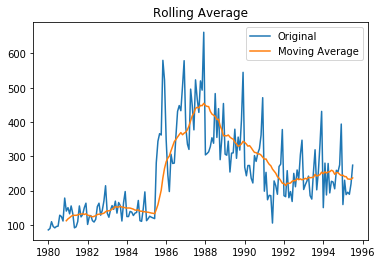

In [146]:
#Plot rolling statistics:
orig = plt.plot(sw, label='Original')
mean = plt.plot(rolmean, label='Moving Average')
plt.legend(loc='best')
plt.title('Rolling Average')

# 3.C

In [113]:
monthly_tempr = pd.pivot_table(datar, values = "Red", columns = "Month", index = "Year")
monthly_tempr = monthly_tempr[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [114]:
monthly_temps = pd.pivot_table(datas, values = "Sparkling", columns = "Month", index = "Year")
monthly_temps = monthly_temps[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

### Below Three graphs are for Red Wine

<Figure size 1152x576 with 0 Axes>

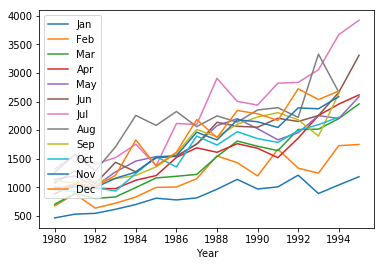

In [125]:
plt.figure(figsize=(16,8))
monthly_tempr.plot()
plt.legend(loc='upper left')

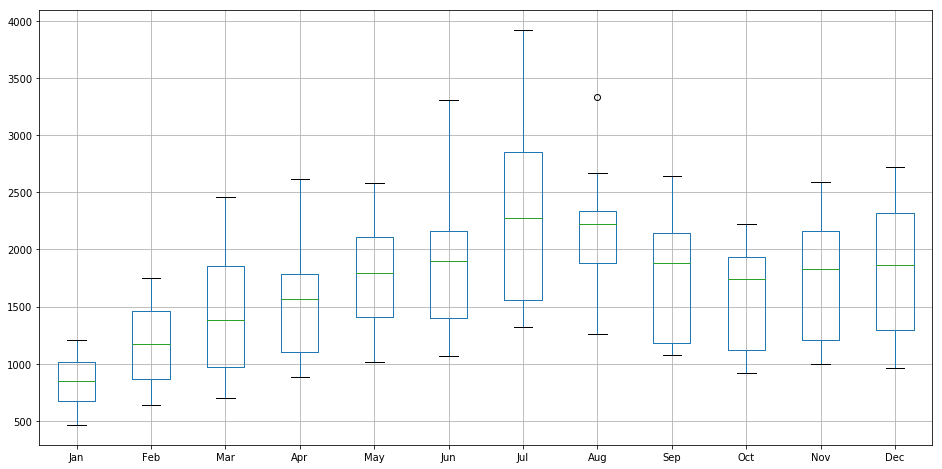

In [126]:
plt.figure(figsize=(16,8))
monthly_tempr.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001788837F748>]],
      dtype=object)

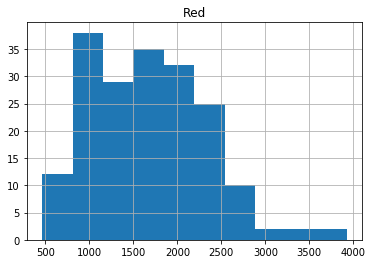

In [138]:
datar.hist(column='Red')

### Below two graphs are for Sparkiling Wine

<Figure size 1152x576 with 0 Axes>

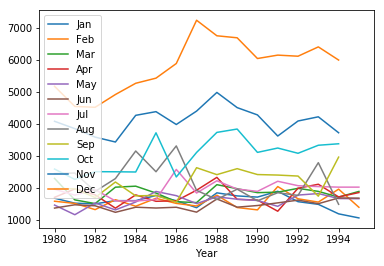

In [127]:
plt.figure(figsize=(16,8))
monthly_temps.plot()
plt.legend(loc='upper left')

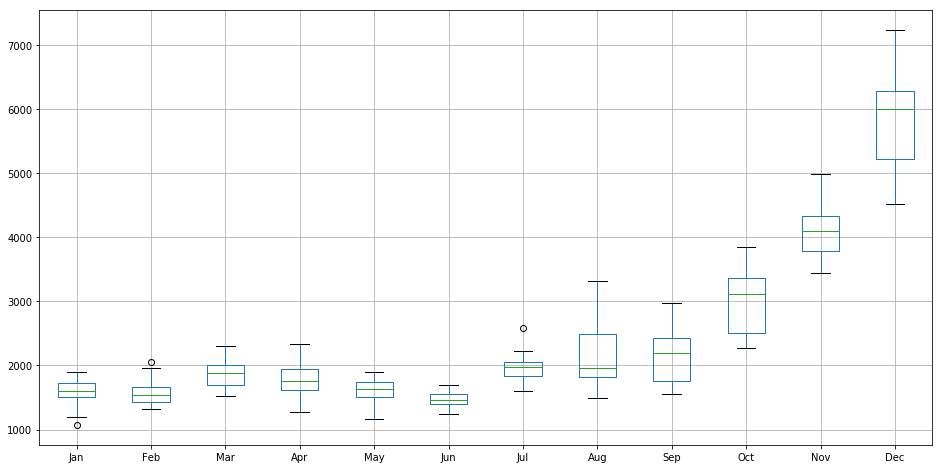

In [128]:
plt.figure(figsize=(16,8))
monthly_temps.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017887DDF978>]],
      dtype=object)

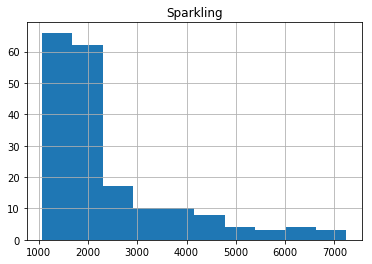

In [140]:
datas.hist(column='Sparkling')

# 3.d

## Below Seasonality Graph is for Red Wine and it has ``Multiplicative seasonality``

Text(0, 0.5, 'Red')

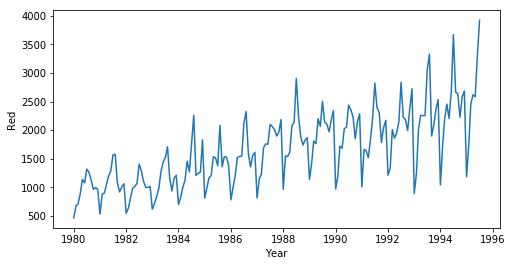

In [133]:
plt.figure(figsize=(8, 4))
plt.plot(datar.Red)
plt.xlabel('Year')
plt.ylabel('Red')

## Below Seasonality Graph is for Sparkiling Wine and it has ``Additive seasonality``

Text(0, 0.5, 'Red')

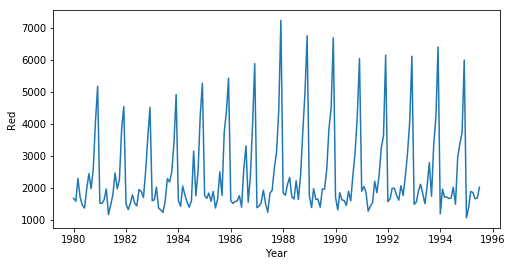

In [137]:
plt.figure(figsize=(8, 4))
plt.plot(datas.Sparkling)
plt.xlabel('Year')
plt.ylabel('Red')

# 3.e Forecast for sparkling wine sales for next 12 months

In [153]:
# Checking for stationary

In [206]:
sw=datas['Sparkling']

In [208]:
result = adfuller(sw) #sw=datas['Sparkling']

In [209]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.360497
p-value: 0.601061
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [210]:
# p value is 0.60. So it is non-stationary series

Text(0, 0.5, 'Log (sw)')

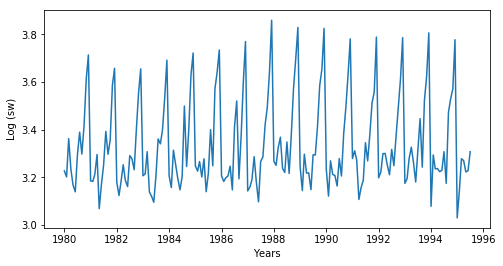

In [211]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sw))
plt.xlabel('Years')
plt.ylabel('Log (sw)')

In [212]:
result1 = adfuller(np.log10(sw))

In [213]:
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.749630
p-value: 0.405740
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [214]:
# using log also not useful again p is 0.40. so log is alos non stationary

In [215]:
sw_diff = sw.diff(periods=1) # same as ts_log_diff = ts - ts.shift(periods=1)
sw_diff.dropna(inplace=True)

In [216]:
result2=adfuller(sw_diff)

In [217]:
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -45.050301
p-value: 0.000000
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


Text(0, 0.5, 'sw_diff')

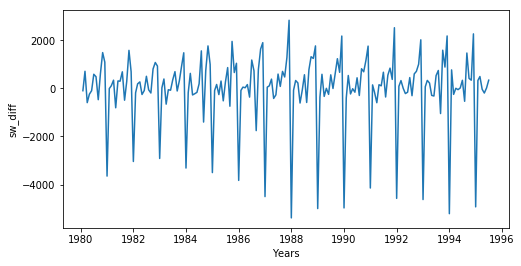

In [218]:
plt.figure(figsize=(8, 4))
plt.plot(sw_diff)
plt.xlabel('Years')
plt.ylabel('sw_diff')

In [219]:
# If you see the above figure their is no trend and almost no seasonality. So  I will take first diffrence

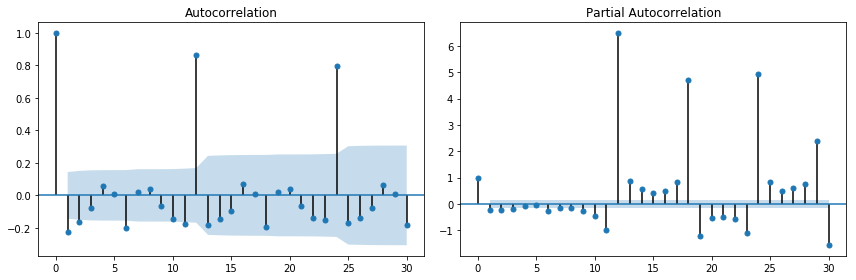

In [220]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sw_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sw_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [221]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [222]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [223]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [225]:
#Creating train and test set 
train=datas[0:int(len(datasw)*0.7)] 
test=datas[int(len(datasw)*0.7):]

In [234]:
train_swdf = train.Sparkling.diff(periods=1)

In [235]:
train_swdf.dropna(inplace=True)

In [230]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [231]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_swdf,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

C:\Users\SRUJAM\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Best SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 model - AIC:1766.3230686616625


In [239]:
best_model = sm.tsa.statespace.SARIMAX(train_swdf,
                                      order=(0, 0, 1),
                                      seasonal_order=(0,1,1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [240]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  129
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -867.948
Date:                            Fri, 28 Dec 2018   AIC                           1741.896
Time:                                    12:58:48   BIC                           1750.182
Sample:                                02-01-1980   HQIC                          1745.260
                                     - 10-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9024      0.046    -19.574      0.000      -0.993      -0.812
ma.S.L12      -0.4607      0.068   

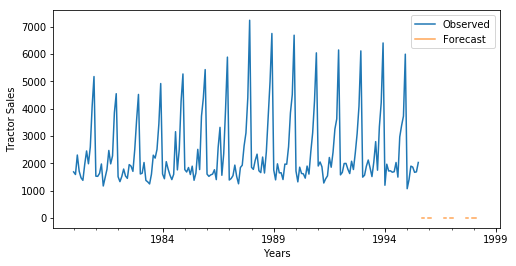

In [243]:
# plot the forecast along with the confidence band
axis = sw.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

In [247]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

In [ ]:
future_forecast = pd.DataFrame(sw,index = test.index,columns=[‘Prediction’])
pd.concat([test,future_forecast],axis=1).iplot()

In [ ]:
print(future_forecast)

In [ ]:
pd.concat([data,future_forecast],axis=1).iplot()

In [ ]:
# I have used arima model to forecast the series. For next 12 months
# parameters are p,q,d